# Lab 1 - ECG analysis & processing

## 1. Testing platform

### Configuration

In [87]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# plot size
plt.rcParams["figure.figsize"] = (8.5,4)

# function for plotting graphs
def drawGraph(number, title):
    fig = plt.figure(number)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    return ax

# silence complex to real casting warnings
import warnings
warnings.filterwarnings('ignore', message='.*ComplexWarning.*')

### Single plot
The cell bellow illustrates data from `ekg100.txt` file.

<IPython.core.display.Javascript object>


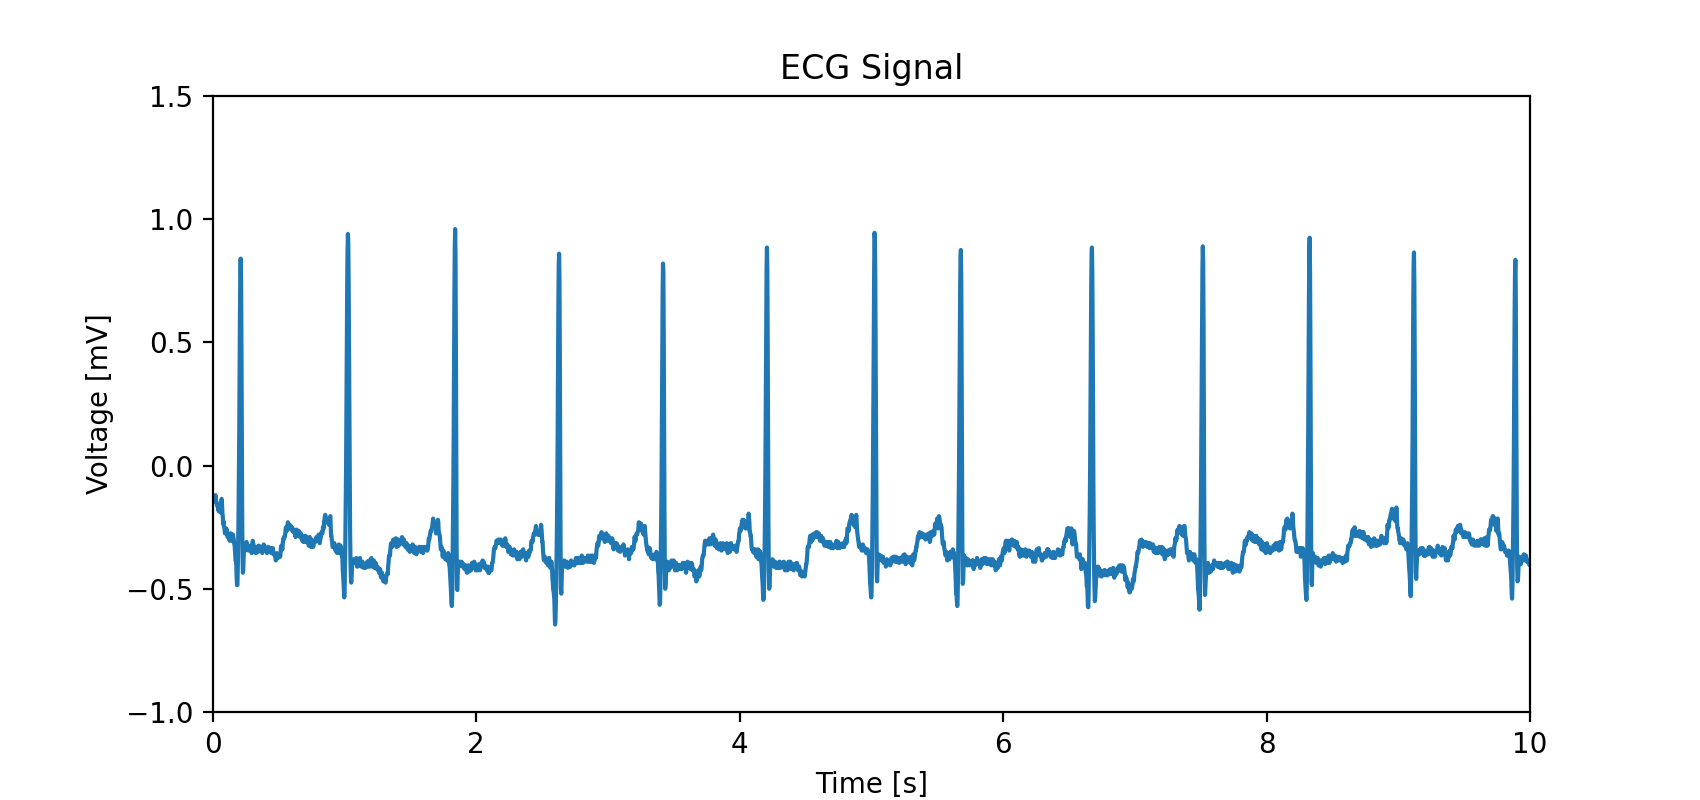

In [52]:
# data loading
data = np.fromfile('data/ekg100.txt', sep=' ')

# given that Fs = 360 Hz
SAMPLING_RATE = 360

X_range = np.arange(stop=(len(data)))
X = X_range / SAMPLING_RATE

fig1 = plt.figure(1)

ax1 = fig1.add_subplot(111)
ax1.set_title("ECG Signal")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [mV]")
ax1.set_xlim([0, 10])
ax1.set_ylim([-1, 1.5])
ax1.plot(X, data)

fig1.canvas.draw()

## 2. Periodic signal analysis

### Sine signal for F<sub>s</sub> = 1000 Hz

<IPython.core.display.Javascript object>


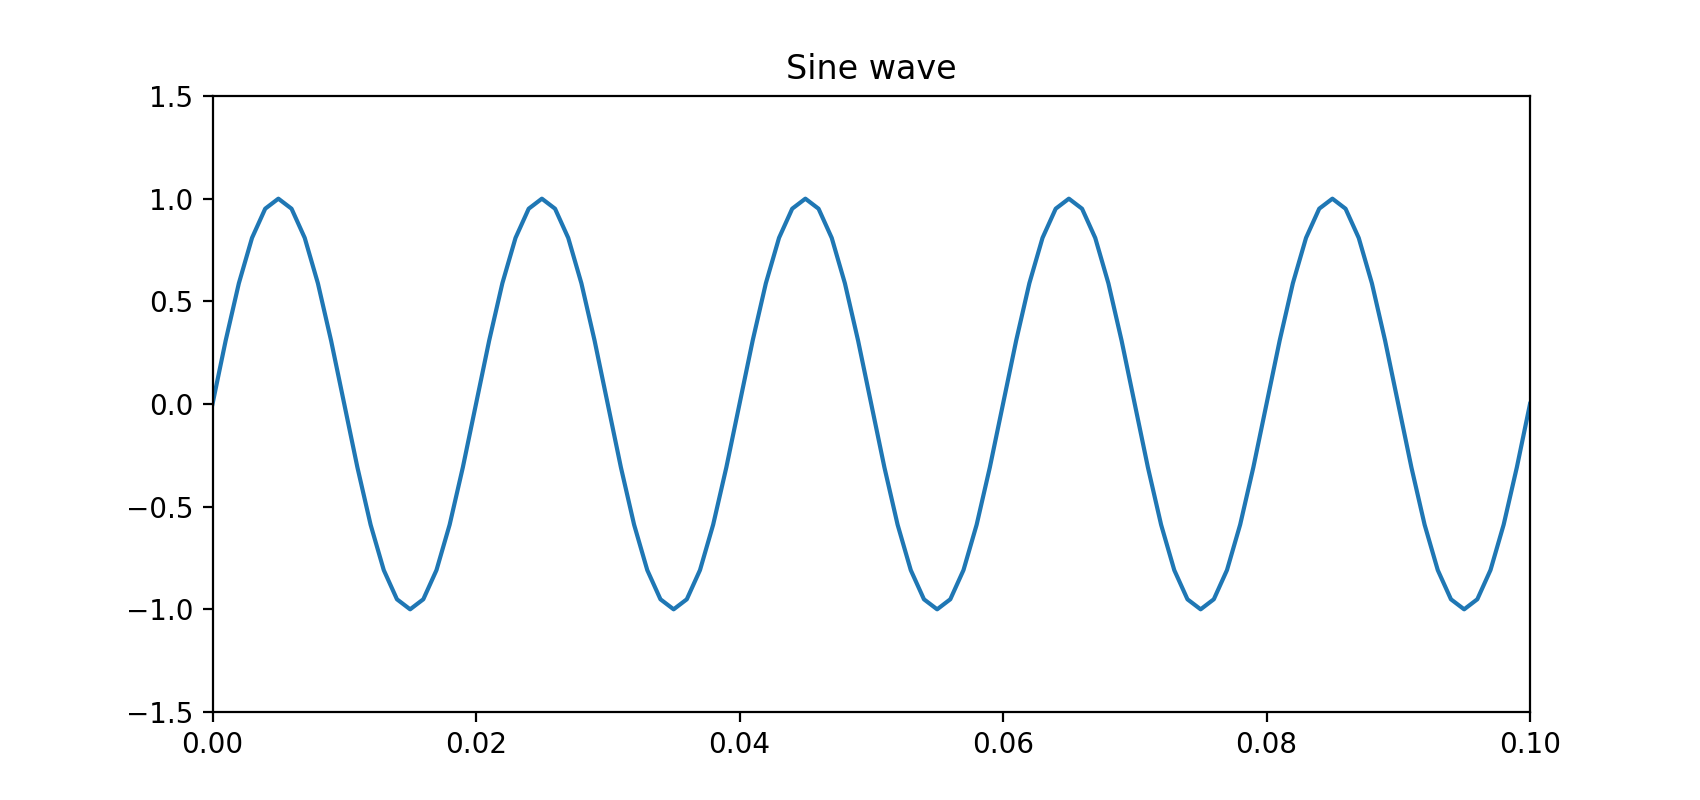

In [53]:
FS = 1000
F = 50
N = 65536
SAMPLES = np.linspace(0.0, N/FS, N)
SINE = np.sin(2*np.pi*F*SAMPLES)

fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
ax2.set_title("Sine wave")
ax2.set_xlim([0, 0.1])
ax2.set_ylim([-1.5, 1.5])
ax2.plot(SAMPLES, SINE)

fig2.canvas.draw()

### Fourier transform of signal

<IPython.core.display.Javascript object>


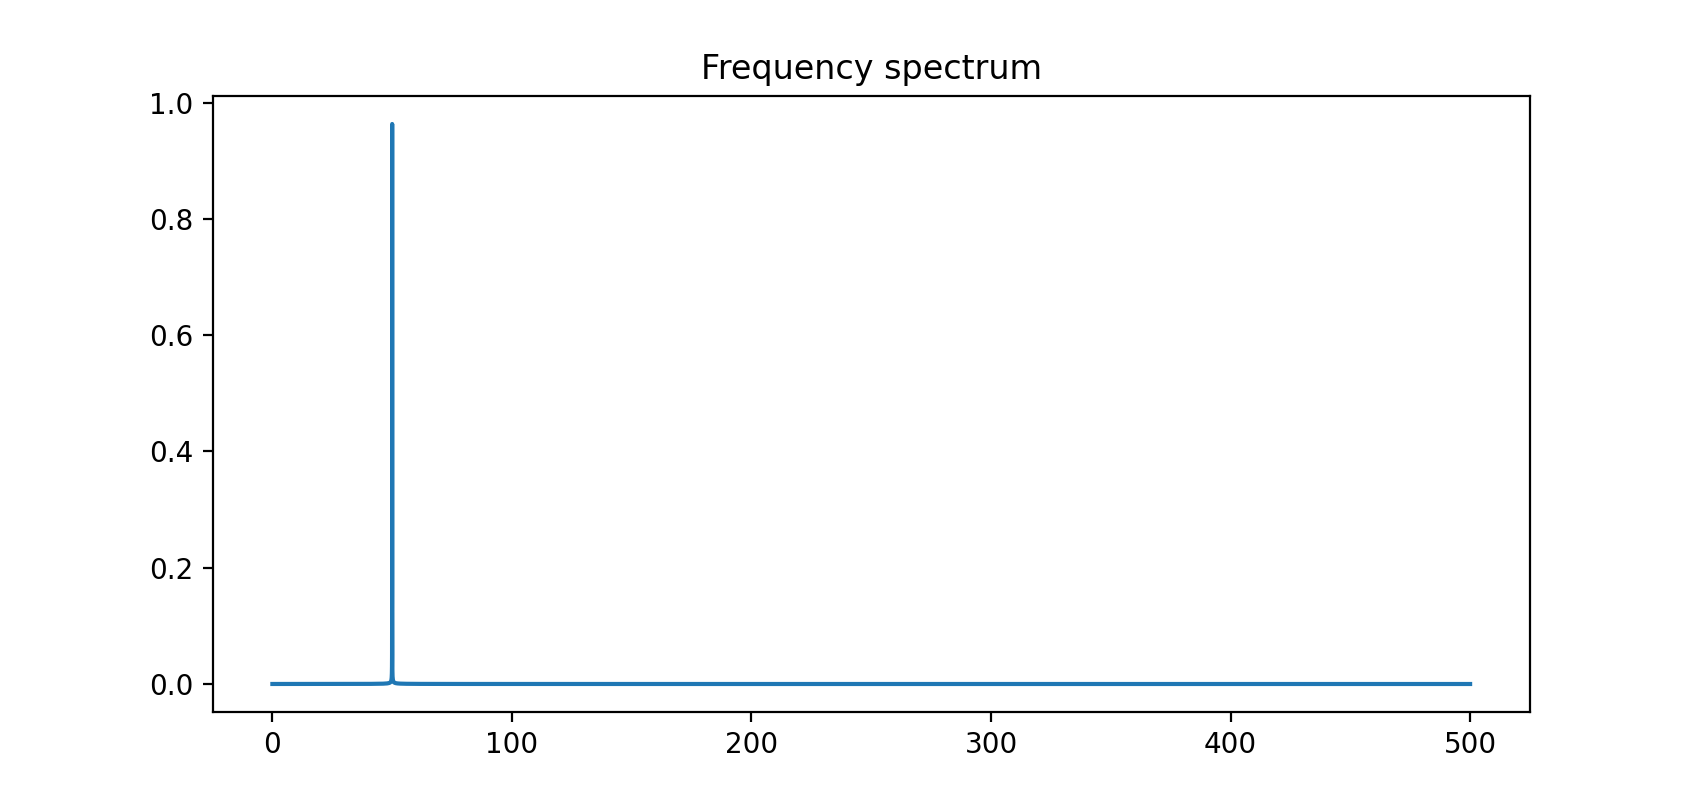

In [54]:
FFT = np.fft.fft(SINE)
Y = 2/N * np.abs(FFT[:N//2])
X = np.linspace(0.0, FS/2, N//2)

fig3 = plt.figure(3)
ax3 = fig3.add_subplot(111)
ax3.set_title("Frequency spectrum")
ax3.plot(X, Y)


### Linear combination of sine waves

<IPython.core.display.Javascript object>


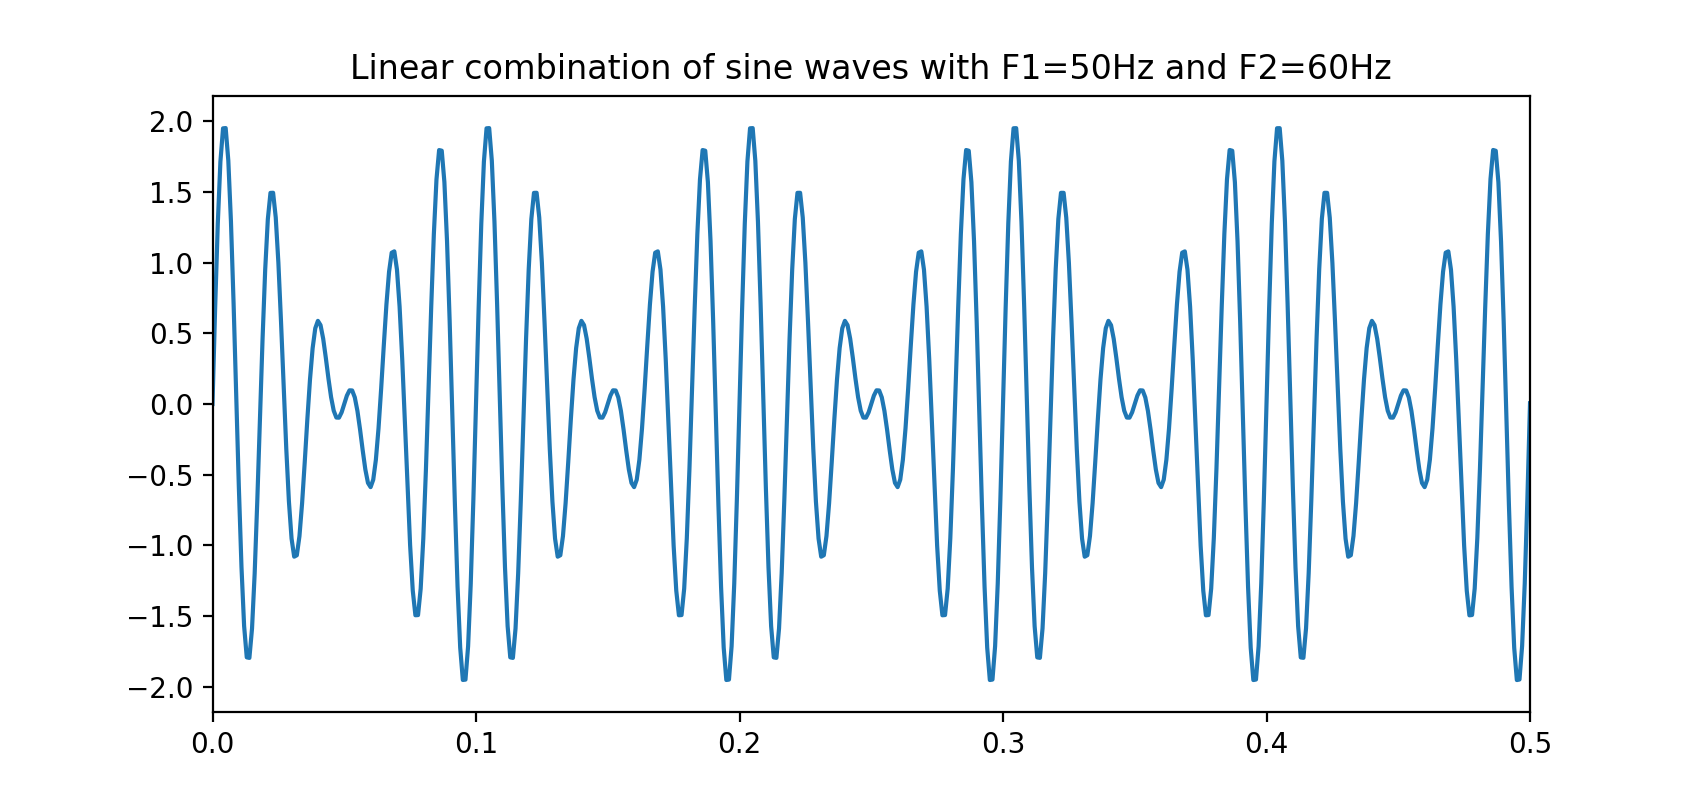

<IPython.core.display.Javascript object>


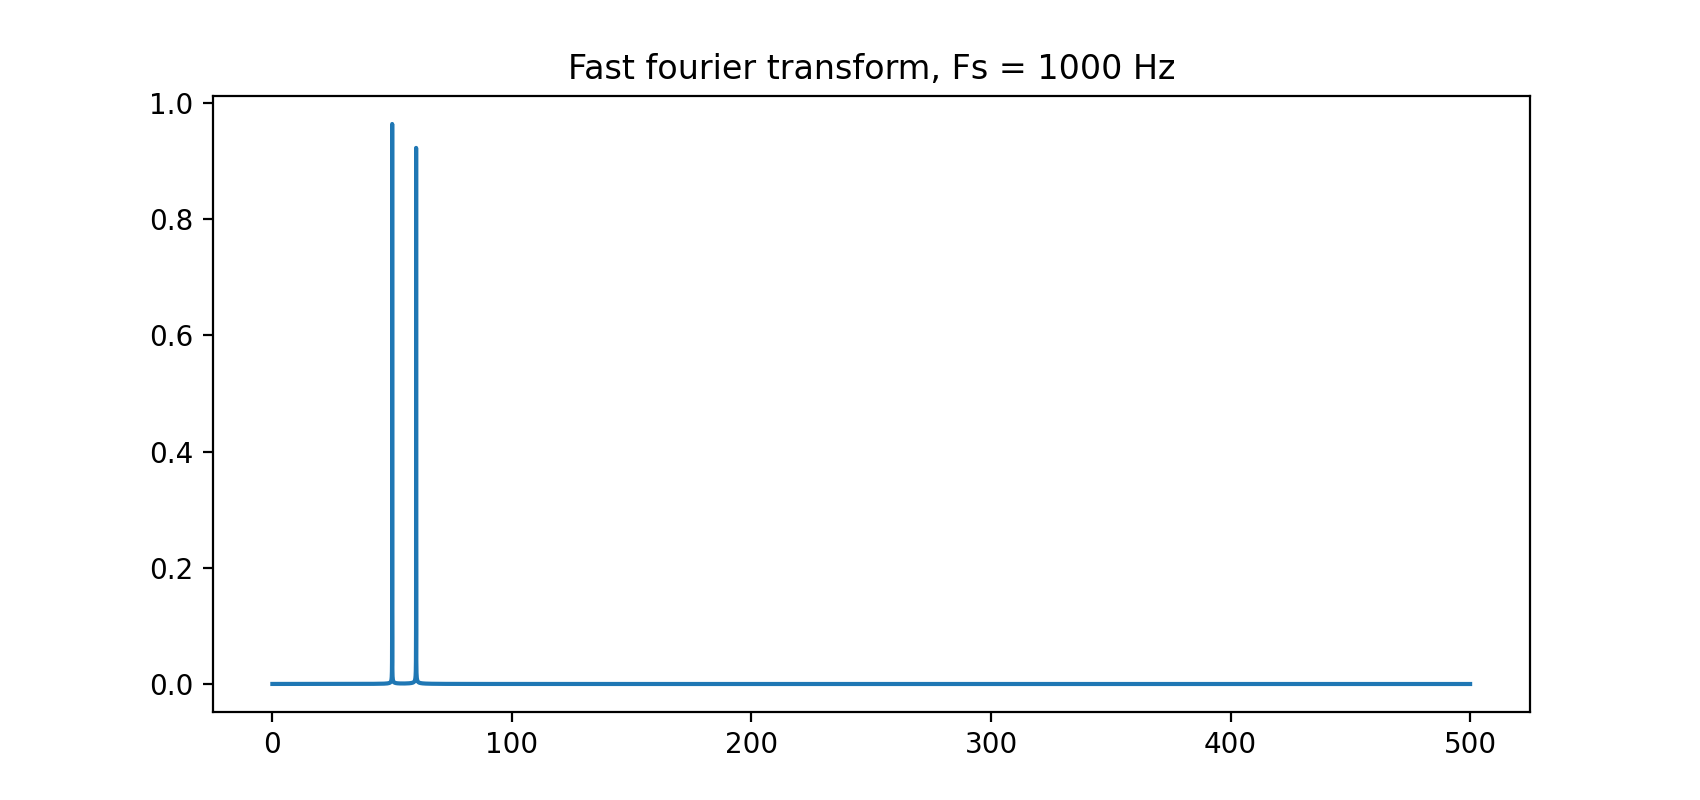

<IPython.core.display.Javascript object>


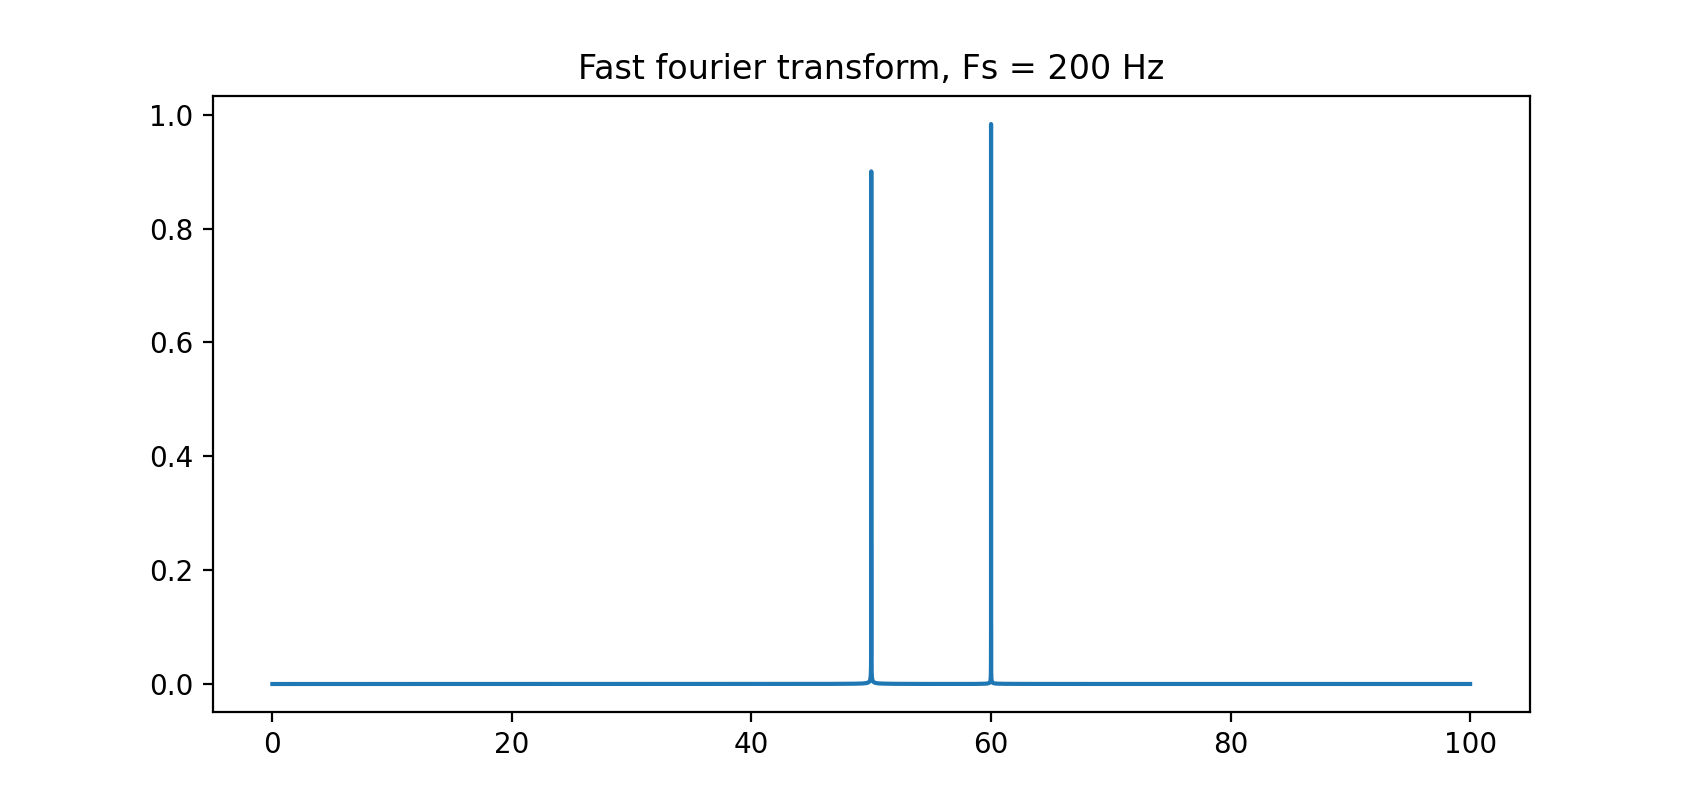

In [55]:
F1 = 50
F2 = 60
SINE_2 = np.sin(2*np.pi*F1*SAMPLES) + np.sin(2*np.pi*F2*SAMPLES)

fig4 = plt.figure(4)
ax4 = fig4.add_subplot(111)
ax4.set_title("Linear combination of sine waves with F1=50Hz and F2=60Hz")
ax4.set_xlim(0, 0.5)
ax4.plot(SAMPLES, SINE_2)

FFT_2 = np.fft.fft(SINE_2)
Y = 2/N * np.abs(FFT_2[:N//2])
fig5 = plt.figure(5)
ax5 = fig5.add_subplot(111)
ax5.set_title("Fast fourier transform, Fs = 1000 Hz")
ax5.plot(X, Y)

# and for Fs=200Hz
FS = 200
SAMPLES_2 = np.linspace(0.0, N/FS, N)
SINE_3 = np.sin(2*np.pi*F1*SAMPLES_2) + np.sin(2*np.pi*F2*SAMPLES_2)
FFT_3 = np.fft.fft(SINE_3)
Y = 2/N * np.abs(FFT_3[:N//2])
X = np.linspace(0.0, FS/2, N//2)
fig6 = plt.figure(6)
ax6 = fig6.add_subplot(111)
ax6.set_title("Fast fourier transform, Fs = 200 Hz")
ax6.plot(X, Y)


### Inverse Fourier transforms

<IPython.core.display.Javascript object>


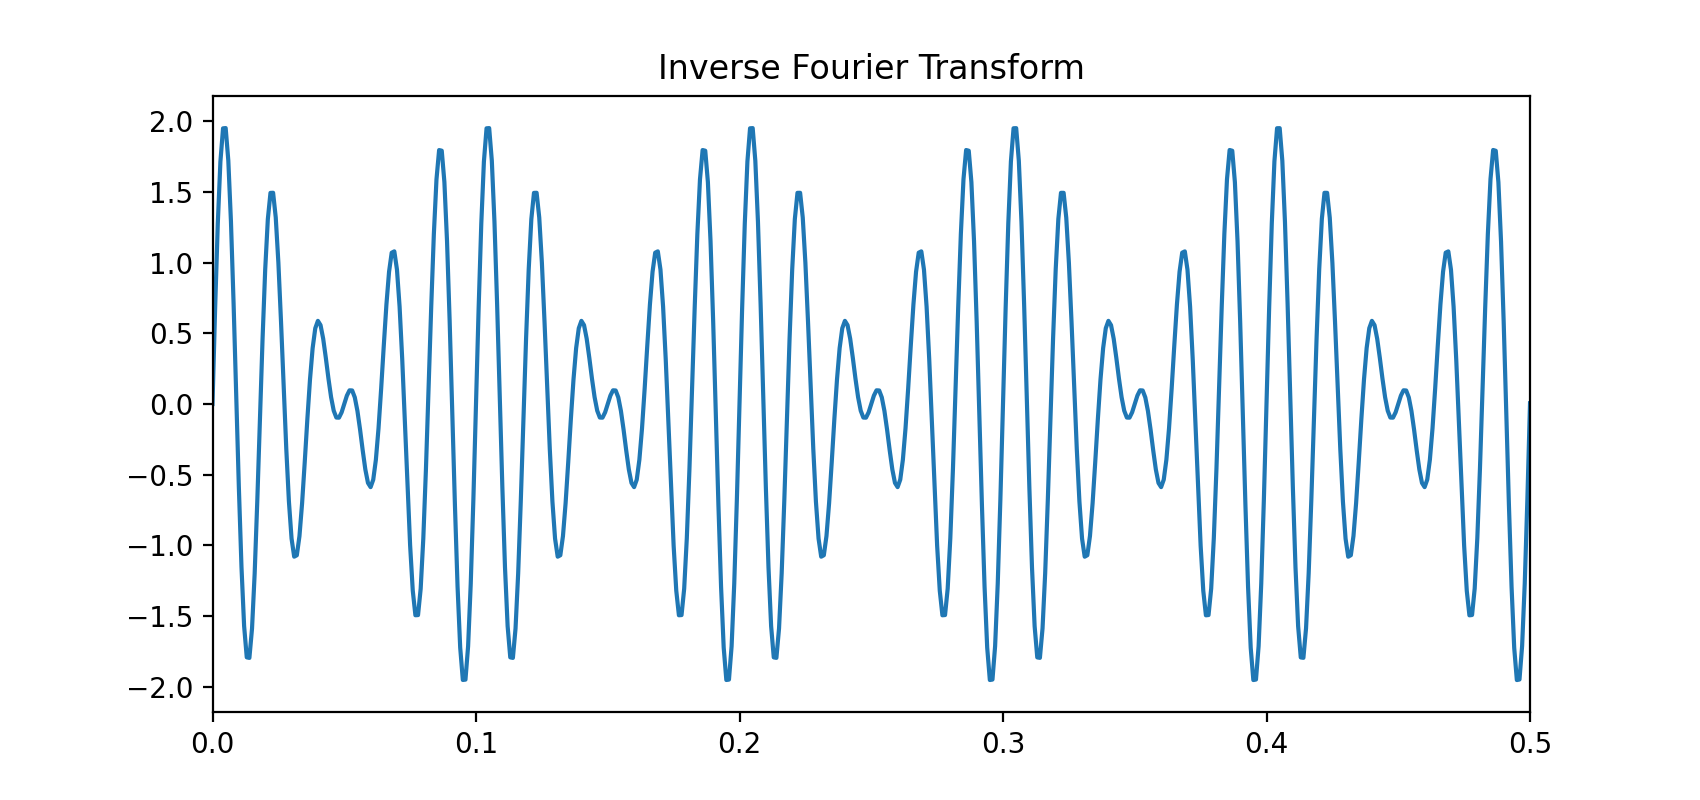

In [85]:
INVERSE  = np.fft.ifft(FFT_2)
fig7 = plt.figure(7)
ax7 = fig7.add_subplot(111)
ax7.set_title("Inverse Fourier Transform")
ax7.set_xlim(0, 0.5)
ax7.plot(SAMPLES, INVERSE)



As we can see, inverse Fourier Transform results in signal which is the same as in Figure 4.

## 3. ECG signal analysis

### Whole signal

<IPython.core.display.Javascript object>


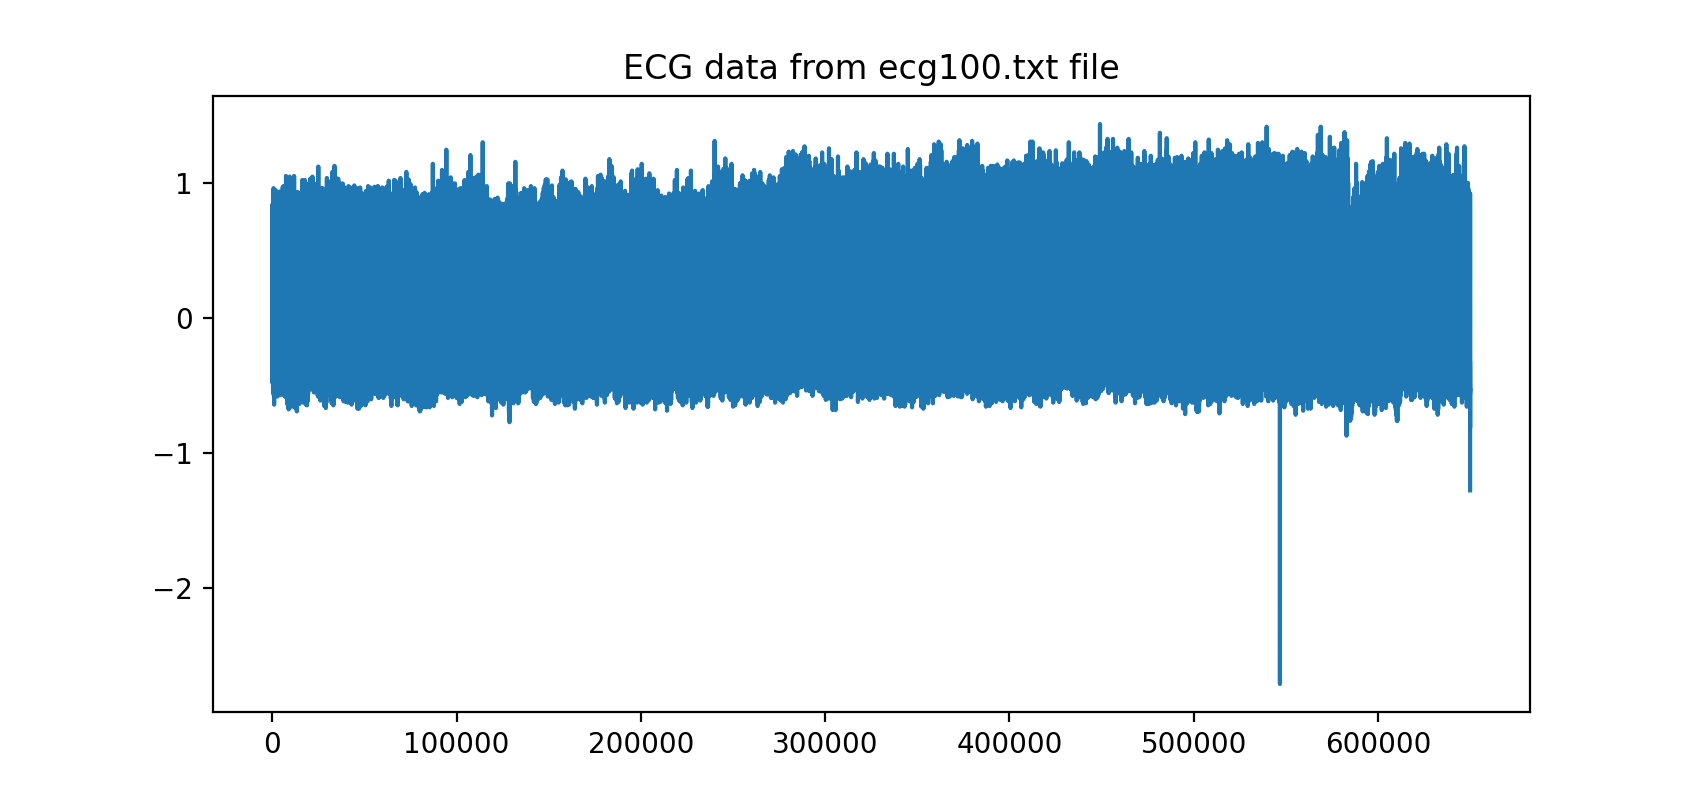

In [71]:
fig8 = plt.figure(8)
ax8 = fig8.add_subplot(111)
ax8.set_title("ECG data from ecg100.txt file")
ax8.plot(data)

### Fourier Transform

<IPython.core.display.Javascript object>


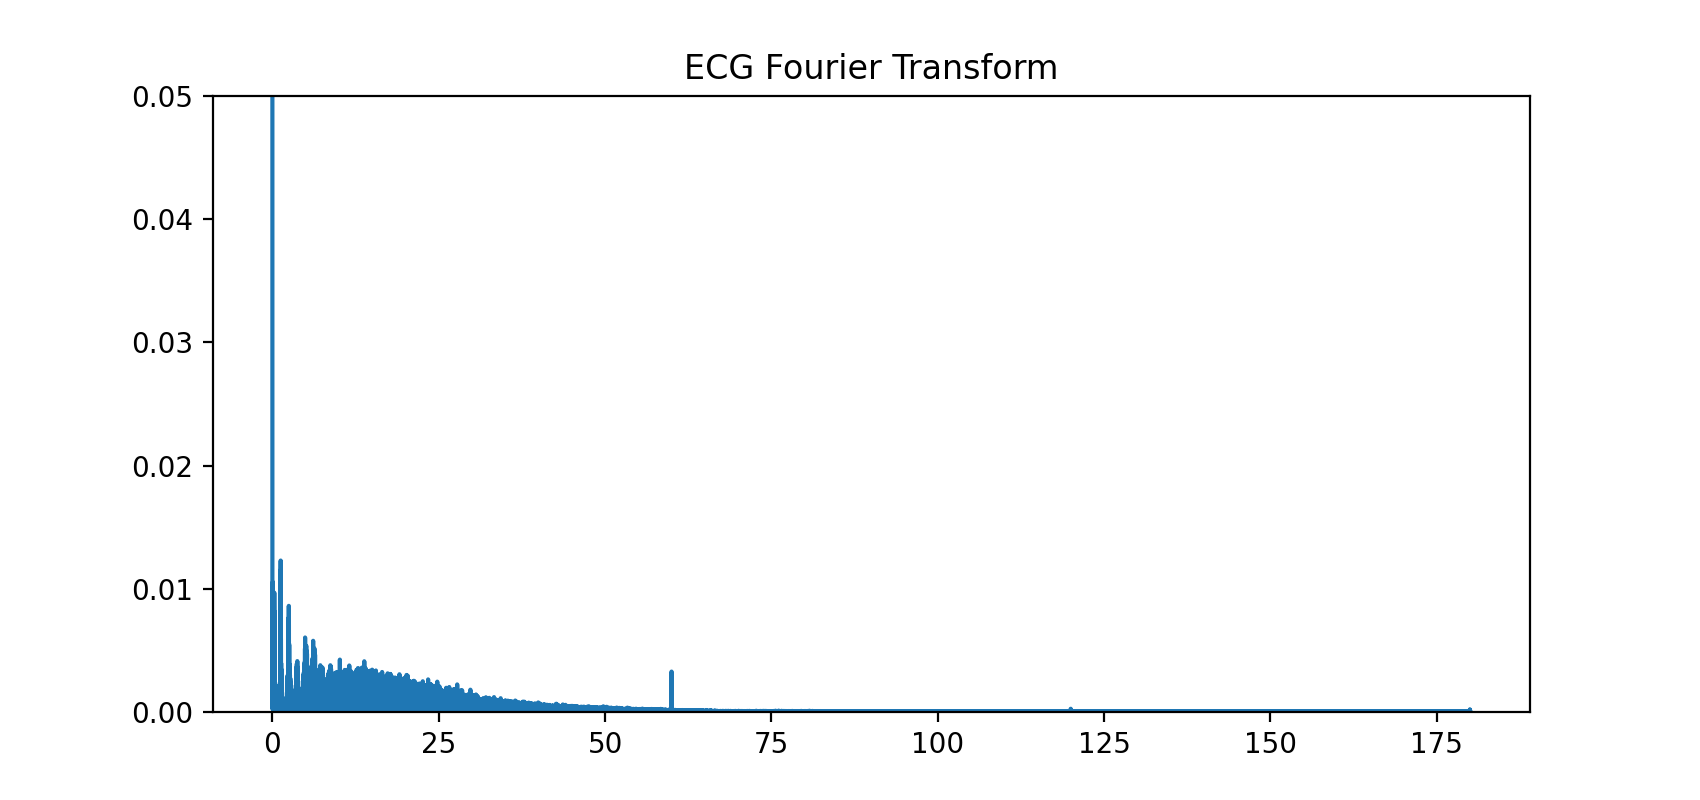

In [70]:
FS_ECG = 360
N_ECG = len(data)
FFT_ECG = np.fft.fft(data)

X = np.linspace(0.0, FS_ECG/2, N_ECG//2)
Y = 2/N_ECG * np.abs(FFT_ECG[:N_ECG//2])
fig9 = plt.figure(9)
ax9 = fig9.add_subplot(111)
ax9.set_title("ECG Fourier Transform")
# ax8.set_xlim(0, 200)
ax9.set_ylim(0, 0.05)
ax9.plot(X, Y)


### Inverse Fourier Transform

<IPython.core.display.Javascript object>


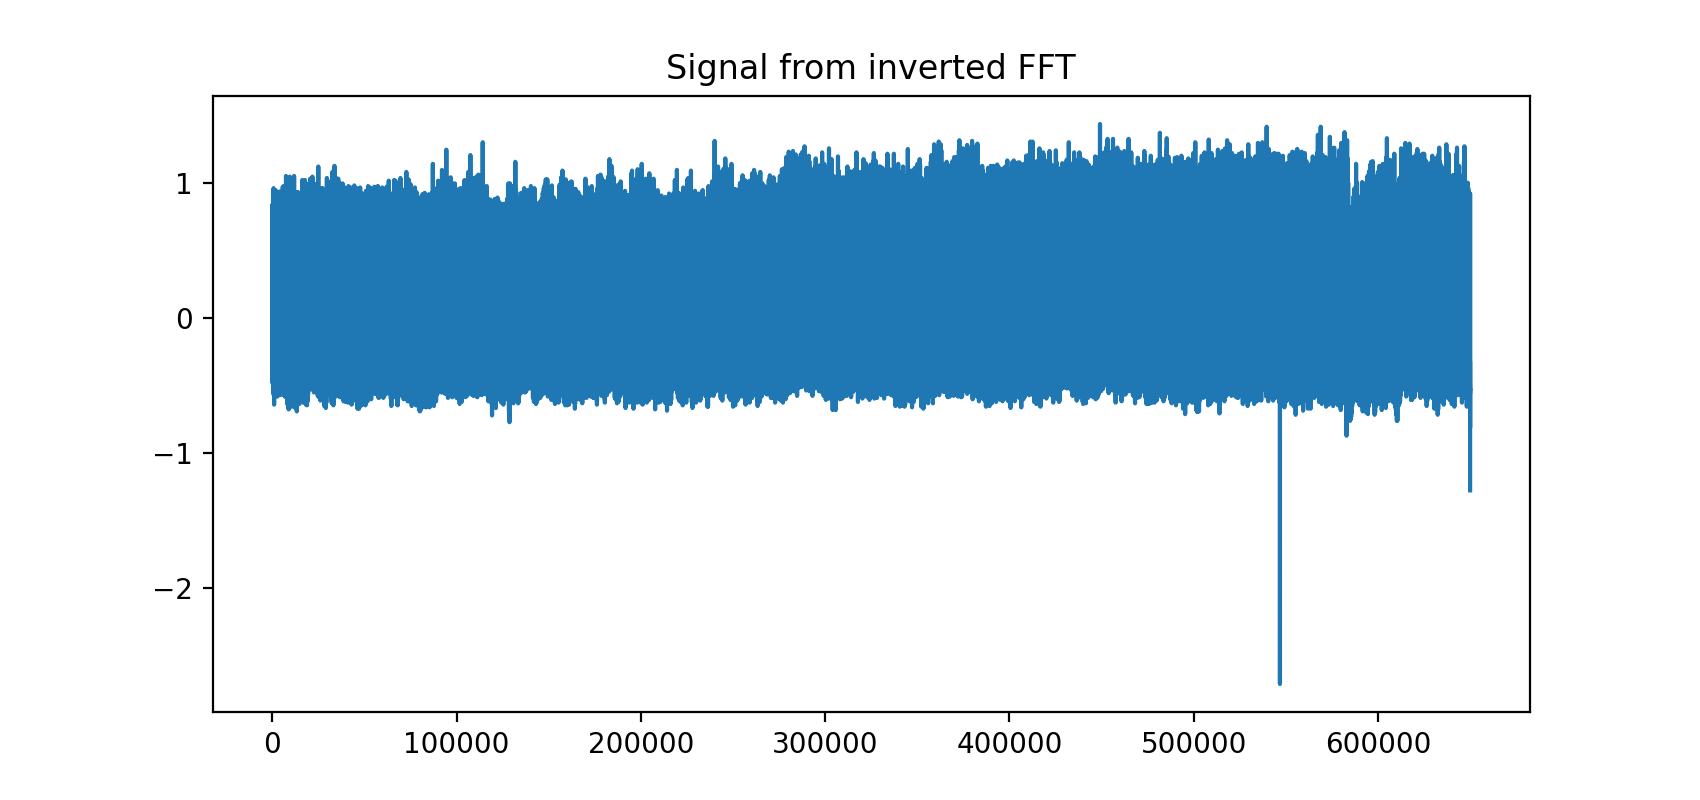

In [88]:
INVERTED_ECG = np.fft.ifft(FFT_ECG)
ax10 = drawGraph(10, "Signal from inverted FFT")
ax10.plot(INVERTED_ECG)
    

### Signal difference

<IPython.core.display.Javascript object>


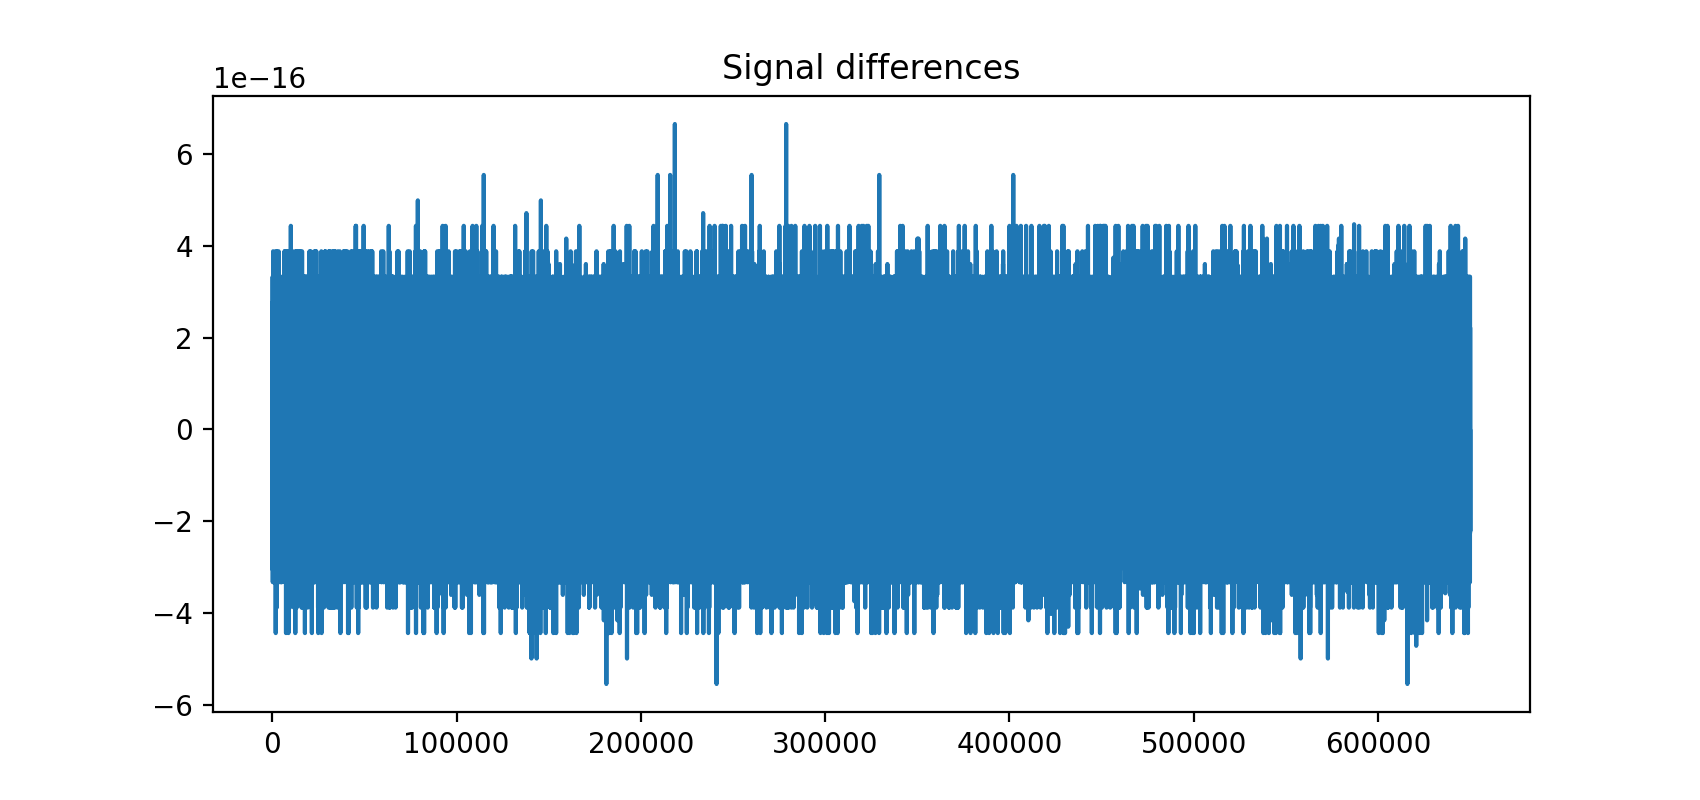

In [89]:
SIGNAL_DIFF = np.subtract(data, INVERTED_ECG)
ax11 = drawGraph(11, "Signal differences")
ax11.plot(SIGNAL_DIFF)

## 4. ECG signal filtering